In [1]:
import importlib

In [2]:
import copy
import numpy as np
import matplotlib.colors as mplcols
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [3]:
import PIPPET, utils
importlib.reload(PIPPET)
importlib.reload(utils)


<module 'utils' from '/Users/cannon/Documents/oscPATIPPET/utils.py'>

## Plotting utils

In [4]:
#%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

plt.style.use('default')
  
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.autolayout'] = False
plt.rcParams['font.size'] = 8
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
sns.set_context('paper', font_scale=0.9)

# Complex rhythm identification

In [8]:
omegas, domega = np.linspace(.8*np.pi, 2.4*2*np.pi, num=20, retstep = True)

(omegas[1:]+omegas[:-1])/2

array([ 2.84396809,  3.50535601,  4.16674394,  4.82813187,  5.48951979,
        6.15090772,  6.81229565,  7.47368358,  8.1350715 ,  8.79645943,
        9.45784736, 10.11923528, 10.78062321, 11.44201114, 12.10339907,
       12.76478699, 13.42617492, 14.08756285, 14.74895077])

In [9]:
p_2 = PIPPET.PIPPETParams()
p_2.dt = 0.0005
p_2.overtime = .5
p_2.sigma_phi = 0.5
p_2.mu_0 = 0
p_2.V_0 = 1


p_2.eta_mu = 0.0
p_2.eta_V = 0.0

p_2.sigma_theta = 0#.75
p_2.sigma_theta_global = .3#0

p_2.tau_p = 2*np.pi/.54
p_2.tau_p_tendency = 0.00
p_2.m_span = 40
p_2.continuous_expectation = True

e_means_2   = np.array([0, np.pi])
e_vars_2    = np.array([0.006,.1])/(2*np.pi/.54)**2
e_lambdas_2 = np.array([0.04,.005])
lambda_0_2 = 0.001

p_2.tempo_scaling = True



In [11]:


p_g_2 = copy.deepcopy(p_2)

unit = np.array([0, 1, 2])

e_times_2 = np.concatenate((unit, unit+2.67, unit+5.33, unit+8))

e_times_2 = np.concatenate((e_times_2, e_times_2[-1] + np.array([1,2,3,4,5,6, 7,8])))

p_g_2.add(e_times_2, e_means_2, e_vars_2, e_lambdas_2, lambda_0_2, '')

m_g_2 = PIPPET.gcPATIPPET(p_g_2, omegas=omegas, prior=None)
m_g_2.run()


KeyboardInterrupt: 

In [ ]:
fig = utils.plot_gcPATIPPET(m_g_2, -1, 2,  -1, '', .1/d, [7,12])
fig.savefig('figures/gc_rhythmchange_2.png', bbox_inches='tight');

In [101]:
plt.close()

/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:5404: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[0] = start
/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:5405: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[N + 1] = end
/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:5408: ComplexWarning: Casting complex values to real discards the imaginary part
  pts[1:N+1, 1] = dep1slice
/Users/cannon/opt/miniconda3/envs/jon_current_env/lib/python3.11/site-packages/matplotlib/axes/_axes.py:5410: ComplexWarning: Casting complex values to real disca

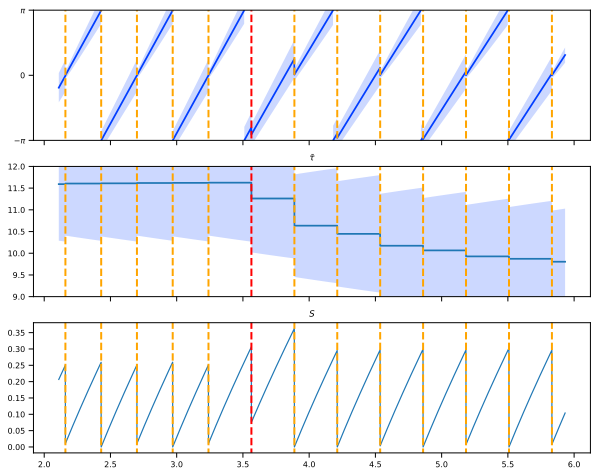

In [91]:
np.minimum(np.array([1,2,3]), 2)


array([1, 2, 2])